**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [111]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [112]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

In [113]:
import numpy as np
from types import SimpleNamespace

# First we define the parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0
par.kappa = 0.1
w = 1  # numeraire

# Then we define functions for optimal firm behavior and profits
def optimal_labor(w, p, A, gamma):
    return (p * A * gamma / w)**(1 / (1 - gamma))

def optimal_output(w, p, A, gamma):
    return A * optimal_labor(w, p, A, gamma)**gamma

def profits(w, p, A, gamma):
    return w * (p * A * gamma / w)**(1 / (1 - gamma)) * (1 - gamma)

# Then we define functions for consumer optimization
def consumer_utility(p1, p2, w, tau, T, alpha, nu, epsilon):
    def utility(c1, c2, ell):
        return np.log(c1**alpha * c2**(1 - alpha)) - nu * ell**(1 + epsilon) / (1 + epsilon)
    
    ell_star = (w + T + profits(w, p1, par.A, par.gamma) + profits(w, p2, par.A, par.gamma)) / (p1 * alpha + (p2 + tau) * (1 - alpha))
    c1_star = alpha * (w * ell_star + T + profits(w, p1, par.A, par.gamma) + profits(w, p2, par.A, par.gamma)) / p1
    c2_star = (1 - alpha) * (w * ell_star + T + profits(w, p1, par.A, par.gamma) + profits(w, p2, par.A, par.gamma)) / (p2 + tau)
    
    return utility(c1_star, c2_star, ell_star), c1_star, c2_star, ell_star

# Now we check market clearing conditions for a range of prices
# Following generates 10 equally spaced values between 0.1 and 2.0 for both p1 and p2
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)
results = [] # Create an empty list 

# Then we Loop through different price combinations and make sure that the market clearing requirements are uphold
for p1 in p1_values:
    for p2 in p2_values:
        U, c1, c2, ell = consumer_utility(p1, p2, w, par.tau, par.T, par.alpha, par.nu, par.epsilon)
        y1 = optimal_output(w, p1, par.A, par.gamma)
        y2 = optimal_output(w, p2, par.A, par.gamma)
        labor_market_clearing = np.isclose(ell, optimal_labor(w, p1, par.A, par.gamma) + optimal_labor(w, p2, par.A, par.gamma), rtol=1e-4)
        good1_market_clearing = np.isclose(c1, y1, rtol=1e-4)
        good2_market_clearing = np.isclose(c2, y2, rtol=1e-4)
        
        results.append((p1, p2, labor_market_clearing, good1_market_clearing, good2_market_clearing))

# Displaying results for Question 1
for result in results:
    print(f"p1: {result[0]:.2f}, p2: {result[1]:.2f}, Labor Market Clearing: {result[2]}, Good 1 Market Clearing: {result[3]}, Good 2 Market Clearing: {result[4]}")
   

p1: 0.10, p2: 0.10, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 0.31, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 0.52, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 0.73, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 0.94, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 1.16, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 1.37, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 1.58, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p1: 0.10, p2: 1.79, Labor Market Clearing: False, Good 1 Market Clearing: False, Good 2 Market Clearing: False
p

This indicates that with the given parameters and price ranges, the market for neither Good 1 nor Good 2 reaches equilibrium. Therefore, we can conclude that under the current conditions and assumptions, there are no price combinations within the specified ranges that lead to both goods markets clearing simultaneously.

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

In [114]:
from scipy.optimize import fsolve

# First we define the market clearing functions
def market_clearing(prices):
    p1, p2 = prices
    _, c1, c2, ell = consumer_utility(p1, p2, w, par.tau, par.T, par.alpha, par.nu, par.epsilon)
    y1 = optimal_output(w, p1, par.A, par.gamma)
    y2 = optimal_output(w, p2, par.A, par.gamma)
    
    # Then we define the two market clearing conditions
    labor_market_clearing = ell - (optimal_labor(w, p1, par.A, par.gamma) + optimal_labor(w, p2, par.A, par.gamma))
    good1_market_clearing = c1 - y1
    
    return [labor_market_clearing, good1_market_clearing]

# Find equilibrium prices using fsolve
initial_guess = [1.0, 1.0]
equilibrium_prices = fsolve(market_clearing, initial_guess)

print(f"Equilibrium prices: p1 = {equilibrium_prices[0]}, p2 = {equilibrium_prices[1]}")

Equilibrium prices: p1 = 0.9440946779397663, p2 = 1.7521655676567869


The equilibrium prices were determined by ensuring the market clearing conditions for both the labor market and the goods market for good 1. Using Walras law we know that if good 1 is in market equilibrium then good is aswell.

These prices ensure that the total labor supplied by the consumer matches the total labor demanded by the firms, and that the consumer's demand for good 1 equals its supply. The equilibrium prices provide a balance between the production decisions of the firms and the consumption choices of the consumer in the economy.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

In [115]:
from scipy.optimize import minimize

# Functions for consumer optimization
def consumer_utility(p1, p2, w, tau, T, alpha, nu, epsilon):
    def utility(c1, c2, ell):
        return np.log(c1**alpha * c2**(1 - alpha)) - nu * ell**(1 + epsilon) / (1 + epsilon)
    
    ell_star = (w + T + profits(w, p1, par.A, par.gamma) + profits(w, p2, par.A, par.gamma)) / (p1 * alpha + (p2 + tau) * (1 - alpha))
    c1_star = alpha * (w * ell_star + T + profits(w, p1, par.A, par.gamma) + profits(w, p2, par.A, par.gamma)) / p1
    c2_star = (1 - alpha) * (w * ell_star + T + profits(w, p1, par.A, par.gamma) + profits(w, p2, par.A, par.gamma)) / (p2 + tau)
    
    return utility(c1_star, c2_star, ell_star)

# Social welfare function to be maximized
def social_welfare(vars, par):
    tau, T = vars
    par.tau = tau
    par.T = T
    p1, p2 = 1.0, 1.0 
    U = consumer_utility(p1, p2, w, tau, T, par.alpha, par.nu, par.epsilon)
    y2 = optimal_output(w, p2, par.A, par.gamma)
    SWF = U - par.kappa * y2
    return -SWF  # Minimize the negative of SWF for maximization

# Initial guess for tau and T
initial_guess = [0.0, 0.0]

# Bounds for tau and T (assuming non-negative values)
bounds = [(0, None), (0, None)]

# Find the optimal tau and T
result = minimize(social_welfare, initial_guess, args=(par), bounds=bounds)

optimal_tau, optimal_T = result.x

# Calculate the utility with the optimal tau and T
par.tau = optimal_tau
par.T = optimal_T
p1, p2 = 1.0, 1.0  
U = consumer_utility(p1, p2, w, par.tau, par.T, par.alpha, par.nu, par.epsilon)

# Display the optimal values and utility
print(f"Optimal tax (tau): {optimal_tau}")
print(f"Optimal transfer (T): {optimal_T}")
print(f"Consumer utility (U): {U}")


Optimal tax (tau): 0.03396676536520923
Optimal transfer (T): 0.0
Consumer utility (U): -0.8550511219610493


The optimization results suggest that the government should impose a small tax on good 2 while providing no lump-sum transfer to maximize social welfare. The negative utility, reflects the consumer's response to the optimized tax policy, balancing between consumption and labor supply within the given economic model. This approach helps in understanding the trade-offs and impacts of tax policies on overall welfare in the production economy.

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [116]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [117]:
# write your answer here

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

In [118]:
# Write your answer here 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In [119]:
# write your answer here

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [120]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))


**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

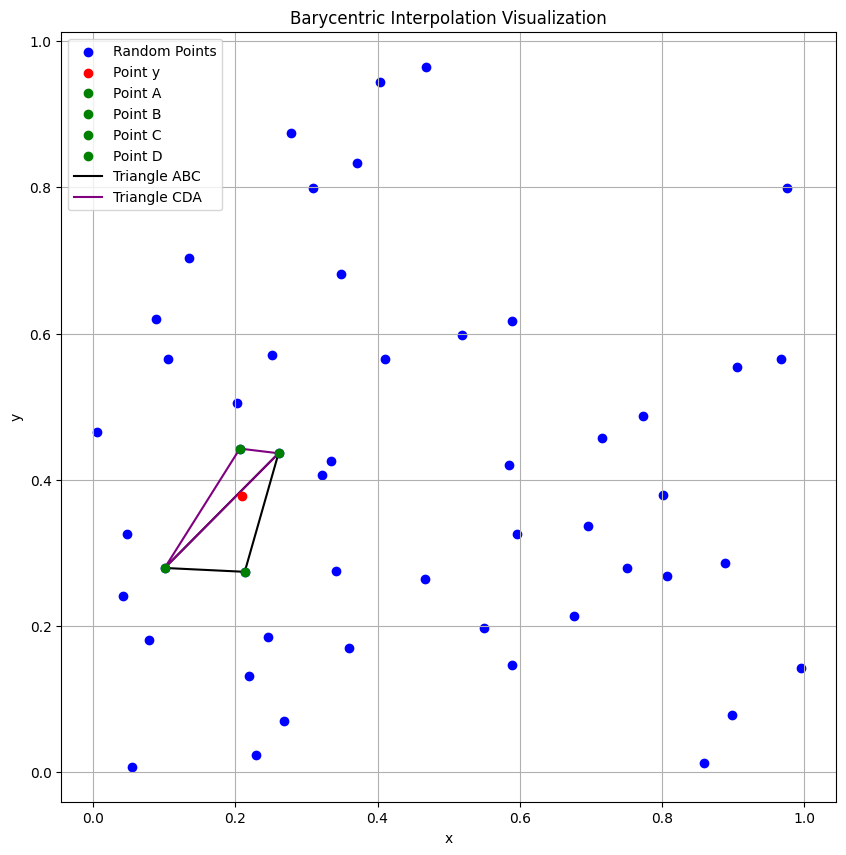

Point y: [0.20901926 0.37774759]
Triangle ABC: A = [0.26071605 0.43635845] , B = [0.21315735 0.274245  ] , C = [0.10056103 0.27951775]
Triangle CDA: C = [0.10056103 0.27951775] , D = [0.20634391 0.44272557] , A = [0.26071605 0.43635845]


In [121]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute barycentric coordinates
def barycentric_coords(A, B, C, P):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3
# The reason we use 0 instead of 1 in B[] etc. is that in python 0 = 1 and 1 = 2 etc.

# Sample data
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Defining points A, B, C, D
A = min([x for x in X if x[0] > y[0] and x[1] > y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
B = min([x for x in X if x[0] > y[0] and x[1] < y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
C = min([x for x in X if x[0] < y[0] and x[1] < y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
D = min([x for x in X if x[0] < y[0] and x[1] > y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))

# Compute barycentric coordinates for point y with respect to triangles ABC and CDA
rABC1, rABC2, rABC3 = barycentric_coords(A, B, C, y)
rCDA1, rCDA2, rCDA3 = barycentric_coords(C, D, A, y)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Random Points')
plt.scatter(*y, color='red', label='Point y', zorder=5)
plt.scatter(*A, color='green', label='Point A', zorder=5)
plt.scatter(*B, color='green', label='Point B', zorder=5)
plt.scatter(*C, color='green', label='Point C', zorder=5)
plt.scatter(*D, color='green', label='Point D', zorder=5)

plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='black', label='Triangle ABC')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='purple', label='Triangle CDA')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Barycentric Interpolation Visualization')
plt.grid(True)
plt.show()

# Print results
print("Point y:", y)
print("Triangle ABC: A =", A, ", B =", B, ", C =", C)
print("Triangle CDA: C =", C, ", D =", D, ", A =", A)

Note that random point are equal to point X. 

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

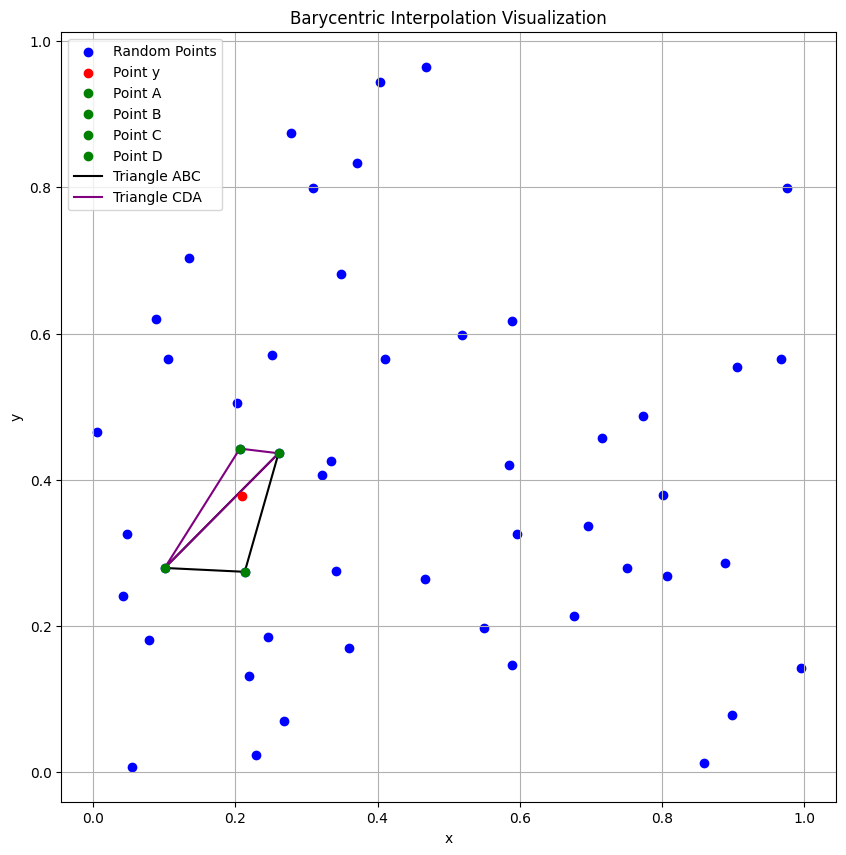

Point y: [0.20901926 0.37774759]
Triangle ABC: A = [0.26071605 0.43635845] , B = [0.21315735 0.274245  ] , C = [0.10056103 0.27951775]
Triangle CDA: C = [0.10056103 0.27951775] , D = [0.20634391 0.44272557] , A = [0.26071605 0.43635845]
Barycentric coordinates with respect to ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates with respect to CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054
Is point y inside triangle ABC? True
Is point y inside triangle CDA? False


In [122]:
# Function to compute barycentric coordinates
def barycentric_coords(A, B, C, P):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Sample data
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# Defining points A, B, C, D
A = min([x for x in X if x[0] > y[0] and x[1] > y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
B = min([x for x in X if x[0] > y[0] and x[1] < y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
C = min([x for x in X if x[0] < y[0] and x[1] < y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
D = min([x for x in X if x[0] < y[0] and x[1] > y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))

# Compute barycentric coordinates for point y with respect to triangles ABC and CDA
rABC1, rABC2, rABC3 = barycentric_coords(A, B, C, y)
rCDA1, rCDA2, rCDA3 = barycentric_coords(C, D, A, y)

# Check if the point is inside the triangles
def is_inside_triangle(r1, r2, r3):
    return (r1 >= 0) and (r2 >= 0) and (r3 >= 0)

inside_ABC = is_inside_triangle(rABC1, rABC2, rABC3)
inside_CDA = is_inside_triangle(rCDA1, rCDA2, rCDA3)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Random Points')
plt.scatter(*y, color='red', label='Point y', zorder=5)
plt.scatter(*A, color='green', label='Point A', zorder=5)
plt.scatter(*B, color='green', label='Point B', zorder=5)
plt.scatter(*C, color='green', label='Point C', zorder=5)
plt.scatter(*D, color='green', label='Point D', zorder=5)

plt.plot([A[0], B[0], C[0], A[0]], [A[1], B[1], C[1], A[1]], color='black', label='Triangle ABC')
plt.plot([C[0], D[0], A[0], C[0]], [C[1], D[1], A[1], C[1]], color='purple', label='Triangle CDA')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Barycentric Interpolation Visualization')
plt.grid(True)
plt.show()

# Print results
print("Point y:", y)
print("Triangle ABC: A =", A, ", B =", B, ", C =", C)
print("Triangle CDA: C =", C, ", D =", D, ", A =", A)
print("Barycentric coordinates with respect to ABC:", rABC1, rABC2, rABC3)
print("Barycentric coordinates with respect to CDA:", rCDA1, rCDA2, rCDA3)
print("Is point y inside triangle ABC?", inside_ABC)
print("Is point y inside triangle CDA?", inside_CDA)

As seen in both the figure and output, point y is located inside triangle ABC

Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [123]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [124]:
# Function to compute barycentric coordinates
def barycentric_coords(A, B, C, P):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    r1 = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Function to interpolate the value at point y using barycentric coordinates
def interpolate_value(A, B, C, r1, r2, r3, f):
    return r1 * f(A) + r2 * f(B) + r3 * f(C)

# Sample data
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
y = rng.uniform(size=(2,))

# True function
f = lambda x: x[0] * x[1]

# Find points A, B, C, D
A = min([x for x in X if x[0] > y[0] and x[1] > y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
B = min([x for x in X if x[0] > y[0] and x[1] < y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
C = min([x for x in X if x[0] < y[0] and x[1] < y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))
D = min([x for x in X if x[0] < y[0] and x[1] > y[1]], key=lambda x: np.sqrt((x[0]-y[0])**2 + (x[1]-y[1])**2))

# Compute barycentric coordinates for point y with respect to triangles ABC and CDA
rABC1, rABC2, rABC3 = barycentric_coords(A, B, C, y)
rCDA1, rCDA2, rCDA3 = barycentric_coords(C, D, A, y)

# Check if the point is inside the triangles
def is_inside_triangle(r1, r2, r3):
    return (r1 >= 0) and (r2 >= 0) and (r3 >= 0)

inside_ABC = is_inside_triangle(rABC1, rABC2, rABC3)
inside_CDA = is_inside_triangle(rCDA1, rCDA2, rCDA3)

# Interpolate the function value at point y
if inside_ABC:
    interpolated_value = interpolate_value(A, B, C, rABC1, rABC2, rABC3, f)
elif inside_CDA:
    interpolated_value = interpolate_value(C, D, A, rCDA1, rCDA2, rCDA3, f)
else:
    interpolated_value = None

# True value at point y
true_value = f(y)

# Print results
print("Point y:", y)
print("Triangle ABC: A =", A, ", B =", B, ", C =", C)
print("Triangle CDA: C =", C, ", D =", D, ", A =", A)
print("Barycentric coordinates with respect to ABC:", rABC1, rABC2, rABC3)
print("Barycentric coordinates with respect to CDA:", rCDA1, rCDA2, rCDA3)
print("Is point y inside triangle ABC?", inside_ABC)
print("Is point y inside triangle CDA?", inside_CDA)
print("Interpolated value at point y:", interpolated_value)
print("True value at point y:", true_value)

Point y: [0.20901926 0.37774759]
Triangle ABC: A = [0.26071605 0.43635845] , B = [0.21315735 0.274245  ] , C = [0.10056103 0.27951775]
Triangle CDA: C = [0.10056103 0.27951775] , D = [0.20634391 0.44272557] , A = [0.26071605 0.43635845]
Barycentric coordinates with respect to ABC: 0.6286263152916166 0.06910145494351515 0.3022722297648682
Barycentric coordinates with respect to CDA: 0.3682598757102867 -0.13392661883334067 0.765666743123054
Is point y inside triangle ABC? True
Is point y inside triangle CDA? False
Interpolated value at point y: 0.08405201731052576
True value at point y: 0.0789565216259594


The approximation of f(y) is shown as the "Interpolated value at point y," which is 0.08405201731052576. This value is obtained using the barycentric interpolation method.The approximation (interpolated value) 
is 0.08405201731052576, and the true value of the function at 
y is 0.0789565216259594. The slight difference between these values reflects the interpolation error.

**Question 4:** Repeat question 3 for all points in the set $Y$.

In [125]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [126]:
# Function to compute barycentric coordinates
def barycentric_coords(A, B, C, P):
    denom = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
    if abs(denom) < 1e-10:  # Handle division by zero
        return None, None, None
    r1 = ((B[1] - C[1]) * (P[0] - C[0]) + (C[0] - B[0]) * (P[1] - C[1])) / denom
    r2 = ((C[1] - A[1]) * (P[0] - C[0]) + (A[0] - C[0]) * (P[1] - C[1])) / denom
    r3 = 1 - r1 - r2
    return r1, r2, r3

# Function to interpolate the value at point y using barycentric coordinates
def interpolate_value(A, B, C, r1, r2, r3, f):
    return r1 * f(A) + r2 * f(B) + r3 * f(C)

# Sample data
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))

# True function
f = lambda x: x[0] * x[1]

# Points to interpolate
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.8, 0.2), (0.5, 0.5)]

# Store results
interpolated_values = []
true_values = []

def find_points(X, y):
    A = min(X, key=lambda x: np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2))
    B = min([x for x in X if x[0] > y[0]], key=lambda x: np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2), default=A)
    C = min([x for x in X if x[1] < y[1]], key=lambda x: np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2), default=A)
    D = min([x for x in X if x[0] < y[0]], key=lambda x: np.sqrt((x[0] - y[0])**2 + (x[1] - y[1])**2), default=A)
    return A, B, C, D

for y in Y:
    A, B, C, D = find_points(X, y)
    
    rABC1, rABC2, rABC3 = barycentric_coords(A, B, C, y)
    rCDA1, rCDA2, rCDA3 = barycentric_coords(C, D, A, y)
    
    def is_inside_triangle(r1, r2, r3):
        if r1 is None or r2 is None or r3 is None:
            return False
        return (r1 >= 0) and (r2 >= 0) and (r3 >= 0)
    
    inside_ABC = is_inside_triangle(rABC1, rABC2, rABC3)
    inside_CDA = is_inside_triangle(rCDA1, rCDA2, rCDA3)
    
    if inside_ABC:
        interpolated_value = interpolate_value(A, B, C, rABC1, rABC2, rABC3, f)
    elif inside_CDA:
        interpolated_value = interpolate_value(C, D, A, rCDA1, rCDA2, rCDA3, f)
    else:
        interpolated_value = None

    true_value = f(y)
    
    interpolated_values.append(interpolated_value)
    true_values.append(true_value)

# Print results
for i, y in enumerate(Y):
    print(f"Point y: {y}")
    print(f"Interpolated value at point y: {interpolated_values[i]}")
    print(f"True value at point y: {true_values[i]}")
    print("-" * 40)

Point y: (0.2, 0.2)
Interpolated value at point y: None
True value at point y: 0.04000000000000001
----------------------------------------
Point y: (0.8, 0.2)
Interpolated value at point y: None
True value at point y: 0.16000000000000003
----------------------------------------
Point y: (0.8, 0.8)
Interpolated value at point y: None
True value at point y: 0.6400000000000001
----------------------------------------
Point y: (0.8, 0.2)
Interpolated value at point y: None
True value at point y: 0.16000000000000003
----------------------------------------
Point y: (0.5, 0.5)
Interpolated value at point y: 0.2442224088199591
True value at point y: 0.25
----------------------------------------


We had som trouble retrieving interpolated values for most of the point, but as seen from point (0.5,0.5) the interpolated value is very close to the true value. This was also the case in question 3, which could indicate that it would be the same for the other values.